In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Task 1: Data Cleaning
### Subtask 1.1
uberReq=pd.read_csv("C:/Users/vijay/Documents/DS &DA/DA/Uber Request Data.csv")
uberReq.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#Correcting the data types
uberReq['Request timestamp']=pd.to_datetime(uberReq['Request timestamp'])
uberReq['Drop timestamp']=pd.to_datetime(uberReq['Drop timestamp'])
uberReq.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [4]:
uberReq.drop(axis=0,columns='Driver id').copy()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT


In [5]:
### Subtask 1.2: Understand the Dataset
#How many unique pickup points are present in uberReq?
print(uberReq['Pickup point'].unique())

['Airport' 'City']


In [6]:
#How many observations are present in uberReq?
uberReq.shape

(6745, 6)

In [7]:
uberReq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [8]:
#Inspect the Null values column-wise
uberReq.isnull().sum(axis=0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
uberReq.drop(axis=0,columns='Driver id')

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT


In [10]:
uberReq.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [11]:
uberReq[(uberReq['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [12]:
print(len(uberReq['Request id'].unique()))
print(len(uberReq['Status'].unique()))
print(len(uberReq['Pickup point'].unique()))

6745
3
2


In [13]:
#Check if there are any duplicate values
len(uberReq[uberReq.duplicated()].index)

0

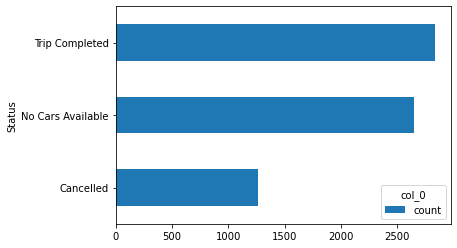

In [14]:
##Task 2: Univariate Analysis

#Univariate analysis on Status column 
status=pd.crosstab(index=uberReq['Status'],columns='count')
status.plot.barh()
plt.show()

In [15]:
###Univariate Analysis conclusion of Status column:
## No cars available is more than the number of trips cancelled.

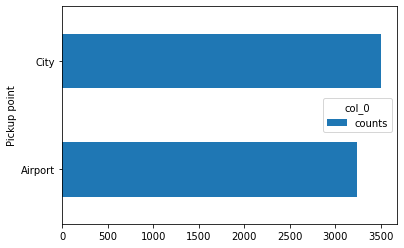

In [16]:
#Univariate analysis on Pickup Point column 
pickup_point=pd.crosstab(index=uberReq['Pickup point'],columns='counts')
pickup_point.plot.barh()
plt.show()

In [17]:
#Univariate Analysis conclusion of Pickup point column:
# The pickup points Airport and City are almost equal times present in the dataset.

In [18]:
# Task 3: Bivariate Analysis

#grouping by Status and Pickup point.
uberReq.groupby(['Status', 'Pickup point']).count()

Request id  Driver id  Request timestamp  \
Status            Pickup point                                             
Cancelled         Airport              198        198                198   
                  City                1066       1066               1066   
No Cars Available Airport             1713          0               1713   
                  City                 937          0                937   
Trip Completed    Airport             1327       1327               1327   
                  City                1504       1504               1504   

                                Drop timestamp  
Status            Pickup point                  
Cancelled         Airport                    0  
                  City                       0  
No Cars Available Airport                    0  
                  City                       0  
Trip Completed    Airport                 1327  
                  City                    1504

In [19]:
uberReq.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

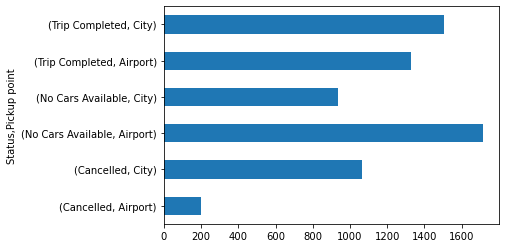

In [20]:
# Visualizing the count of Status and Pickup point bivariate analysis
uberReq.groupby(['Status','Pickup point']).size().plot.barh()
plt.show()

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

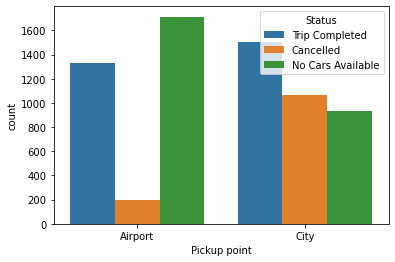

In [21]:
sns.countplot(x=uberReq['Pickup point'],hue=uberReq['Status'], data=uberReq)

In [22]:
#Bivariate Analysis conclusion of Status and Pickup point columns:
#There are more No cars available from Airport to City and There are more cars Cancelled from City to Airport.

In [23]:
#Task 4: Deriving new metrics

#Request and Drop hours
uberReq['Request Hour']=uberReq['Request timestamp'].dt.hour



In [24]:
uberReq['Request Time slot']='Elary Morning'
uberReq.loc[uberReq['Request Hour'].between(5,8, inclusive=True),'Request Time slot']=' Morning'
uberReq.loc[uberReq['Request Hour'].between(9,12, inclusive=True),'Request Time slot']='Late Morning'
uberReq.loc[uberReq['Request Hour'].between(13,16, inclusive=True),'Request Time slot']='Noon'
uberReq.loc[uberReq['Request Hour'].between(17,21, inclusive=True),'Request Time slot']='Evening'
uberReq.loc[uberReq['Request Hour'].between(22,24, inclusive=True),'Request Time slot']='Night'

In [25]:
#As Demand can include trips completed, cancelled or no cars available.

uberReq['Demand']=1



In [26]:
uberReq['Supply']=0
uberReq.loc[(uberReq['Status']=='Trip Completed'),'Supply']=1

In [27]:
uberReq['Gap']= uberReq['Demand'] - uberReq['Supply']
uberReq.loc[uberReq['Gap']==0,'Gap']='Trip Completed'
uberReq.loc[uberReq['Gap']==1,'Gap']='Trip Not Completed'

In [28]:
uberReq.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time slot,Demand,Supply,Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,1,1,Trip Completed
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1,Trip Completed
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,1,1,Trip Completed
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening,1,1,Trip Completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,1,1,Trip Completed


<AxesSubplot:xlabel='Request Time slot', ylabel='count'>

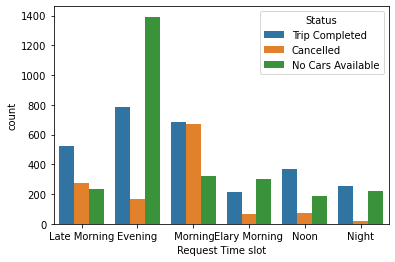

In [29]:
#Task 5: Graphical Analysis

# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=uberReq['Request Time slot'], hue=uberReq['Status'],data=uberReq)

In [30]:
#Conclusions from above plot :
#Most No Cars Available are in the Evening.
#Most Cancelled trips are in the Morning.

<AxesSubplot:ylabel='Pickup point,Request Time slot'>

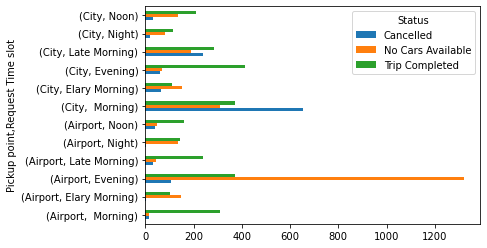

In [31]:
pick_up=pd.DataFrame(uberReq.groupby(['Pickup point','Request Time slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pick_up.plot.barh()

In [32]:
#Conclusions from above plot :
#Most No Cars Available are in the Evening from Airport to City.
#Most Cancelled trips are in the Morning from City to Airport.

<AxesSubplot:xlabel='Gap', ylabel='count'>

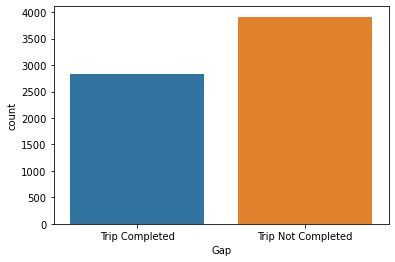

In [33]:
sns.countplot(x=uberReq['Gap'],data=uberReq)

In [34]:
#Conclusions from above plot :
#More Trip not completed than Trip Completed.

<AxesSubplot:ylabel='Request Time slot'>

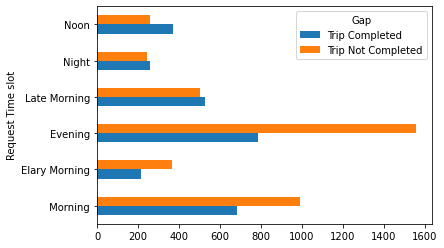

In [35]:
gap_time_slot=pd.DataFrame(uberReq.groupby(['Request Time slot', 'Gap'])['Request id'].count().unstack(fill_value=0))
gap_time_slot.plot.barh()

<AxesSubplot:xlabel='Pickup point'>

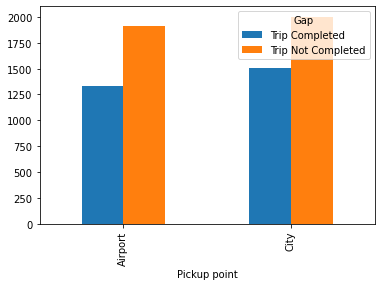

In [36]:
gap_pickup=pd.DataFrame(uberReq.groupby(['Pickup point', 'Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup.plot.bar()

<AxesSubplot:xlabel='Request Time slot,Pickup point'>

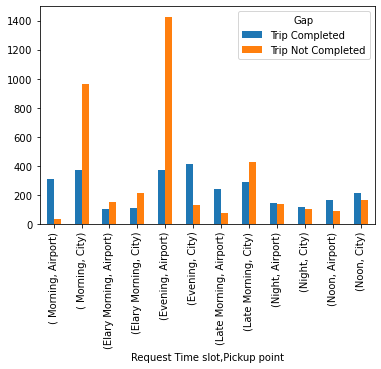

In [42]:
gap_main=pd.DataFrame(uberReq.groupby(['Request Time slot','Pickup point', 'Gap'])['Request id'].count().unstack(fill_value=0))
gap_main.plot.bar()